In [147]:
#Import some extention libraries
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import numpy as np
import pandas as pd
import pandas_profiling
import plotly.offline as po
import plotly.graph_objs as go
import xlsxwriter
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score
from sklearn import metrics
from pandas_profiling import ProfileReport
import math
import re
from scipy.optimize import curve_fit
from scipy.stats import zscore
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
%matplotlib inline

## CHECK/CLEAN THE EXTRACTED DATA SET

In [148]:
USACarsDatasets = pd.read_excel(r"C:\Users\Sales\USACarsDatasets.xlsx")

In [149]:
CJC = USACarsDatasets
CJC

Unnamed: 0  price      brand    model  year   title_status  mileage  \
0              0   6300     toyota  cruiser  2008  clean vehicle   274117   
1              1   2899       ford       se  2011  clean vehicle   190552   
2              2   5350      dodge      mpv  2018  clean vehicle    39590   
3              3  25000       ford     door  2014  clean vehicle    64146   
4              4  27700  chevrolet     1500  2018  clean vehicle     6654   
...          ...    ...        ...      ...   ...            ...      ...   
2494        2494   7800     nissan    versa  2019  clean vehicle    23609   
2495        2495   9200     nissan    versa  2018  clean vehicle    34553   
2496        2496   9200     nissan    versa  2018  clean vehicle    31594   
2497        2497   9200     nissan    versa  2018  clean vehicle    32557   
2498        2498   9200     nissan    versa  2018  clean vehicle    31371   

       color                  vin        lot       state country  \
0      black    jtezu11f88k007763  159348797  new jersey     usa   
1     silver    2fmdk3gc4bbb02217  166951262   tennessee     usa   
2     silver    3c4pdcgg5jt346413  167655728     georgia     usa   
3       blue    1ftfw1et4efc23745  167753855    virginia     usa   
4        red    3gcpcrec2jg473991  167763266     florida     usa   
...      ...                  ...        ...         ...     ...   
2494     red    3n1cn7ap9kl880319  167722715  california     usa   
2495  silver    3n1cn7ap5jl884088  167762225     florida     usa   
2496  silver    3n1cn7ap9jl884191  167762226     florida     usa   
2497   black    3n1cn7ap3jl883263  167762227     florida     usa   
2498  silver    3n1cn7ap4jl884311  167762228     florida     usa   

          condition  
0      10 days left  
1       6 days left  
2       2 days left  
3     22 hours left  
4     22 hours left  
...             ...  
2494    1 days left  
2495  21 hours left  
2496  21 hours left  
2497    2 days left  
2498  21 hours left  

[2499 rows x 13 columns]

In [150]:
CJC.isnull().any()

Unnamed: 0      False
price           False
brand           False
model           False
year            False
title_status    False
mileage         False
color           False
vin             False
lot             False
state           False
country         False
condition       False
dtype: bool

In [151]:
CJC.shape

(2499, 13)

In [152]:
CJC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    2499 non-null   int64 
 1   price         2499 non-null   int64 
 2   brand         2499 non-null   object
 3   model         2499 non-null   object
 4   year          2499 non-null   int64 
 5   title_status  2499 non-null   object
 6   mileage       2499 non-null   int64 
 7   color         2499 non-null   object
 8   vin           2499 non-null   object
 9   lot           2499 non-null   int64 
 10  state         2499 non-null   object
 11  country       2499 non-null   object
 12  condition     2499 non-null   object
dtypes: int64(5), object(8)
memory usage: 253.9+ KB


In [153]:
print(CJC['brand'].unique())
print(CJC['year'].unique())
print(CJC['title_status'].unique())
print(CJC['color'].unique())
print(CJC['condition'].unique())

['toyota' 'ford' 'dodge' 'chevrolet' 'gmc' 'chrysler' 'kia' 'buick'
 'infiniti' 'mercedes-benz' 'jeep' 'bmw' 'cadillac' 'hyundai' 'mazda'
 'honda' 'heartland' 'jaguar' 'acura' 'harley-davidson' 'audi' 'lincoln'
 'lexus' 'nissan' 'land' 'maserati' 'peterbilt' 'ram']
[2008 2011 2018 2014 2010 2017 2009 2013 2015 2020 2016 1973 2003 2019
 2002 2000 2001 2005 2012 2006 2007 1998 2004 1994 1997 1996 1999 1984
 1995 1993]
['clean vehicle' 'salvage insurance']
['black' 'silver' 'blue' 'red' 'white' 'gray' 'orange' 'brown' 'no_color'
 'gold' 'charcoal' 'turquoise' 'beige' 'green' 'dark blue' 'maroon'
 'phantom black' 'yellow' 'color:' 'light blue' 'toreador red'
 'bright white clearcoat' 'billet silver metallic clearcoat'
 'black clearcoat' 'jazz blue pearlcoat' 'purple'
 'ruby red metallic tinted clearcoat' 'triple yellow tri-coat'
 'competition orange' 'off-white' 'shadow black' 'magnetic metallic'
 'ingot silver metallic' 'ruby red'
 'royal crimson metallic tinted clearcoat' 'kona blue meta

In [154]:
profile = ProfileReport(CJC,title='USA Cars Sales Data',html={'style': {'full_width':True}})

In [155]:
profile

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [156]:
CJC[['0','time_qty','0','unit','status']] = CJC['condition'].str.split('(\w*.)',n=2,expand=True)
CJC.drop(['Unnamed: 0','vin','state','country','condition','0'],axis=1,inplace=True)
CJC

price      brand    model  year   title_status  mileage   color  \
0      6300     toyota  cruiser  2008  clean vehicle   274117   black   
1      2899       ford       se  2011  clean vehicle   190552  silver   
2      5350      dodge      mpv  2018  clean vehicle    39590  silver   
3     25000       ford     door  2014  clean vehicle    64146    blue   
4     27700  chevrolet     1500  2018  clean vehicle     6654     red   
...     ...        ...      ...   ...            ...      ...     ...   
2494   7800     nissan    versa  2019  clean vehicle    23609     red   
2495   9200     nissan    versa  2018  clean vehicle    34553  silver   
2496   9200     nissan    versa  2018  clean vehicle    31594  silver   
2497   9200     nissan    versa  2018  clean vehicle    32557   black   
2498   9200     nissan    versa  2018  clean vehicle    31371  silver   

            lot time_qty    unit status  
0     159348797      10    days    left  
1     166951262       6    days    left  
2     167655728       2    days    left  
3     167753855      22   hours    left  
4     167763266      22   hours    left  
...         ...      ...     ...    ...  
2494  167722715       1    days    left  
2495  167762225      21   hours    left  
2496  167762226      21   hours    left  
2497  167762227       2    days    left  
2498  167762228      21   hours    left  

[2499 rows x 11 columns]

In [157]:
CJC['status'].replace(['left'],['hrs left'], inplace=True)
CJC

price      brand    model  year   title_status  mileage   color  \
0      6300     toyota  cruiser  2008  clean vehicle   274117   black   
1      2899       ford       se  2011  clean vehicle   190552  silver   
2      5350      dodge      mpv  2018  clean vehicle    39590  silver   
3     25000       ford     door  2014  clean vehicle    64146    blue   
4     27700  chevrolet     1500  2018  clean vehicle     6654     red   
...     ...        ...      ...   ...            ...      ...     ...   
2494   7800     nissan    versa  2019  clean vehicle    23609     red   
2495   9200     nissan    versa  2018  clean vehicle    34553  silver   
2496   9200     nissan    versa  2018  clean vehicle    31594  silver   
2497   9200     nissan    versa  2018  clean vehicle    32557   black   
2498   9200     nissan    versa  2018  clean vehicle    31371  silver   

            lot time_qty    unit    status  
0     159348797      10    days   hrs left  
1     166951262       6    days   hrs left  
2     167655728       2    days   hrs left  
3     167753855      22   hours   hrs left  
4     167763266      22   hours   hrs left  
...         ...      ...     ...       ...  
2494  167722715       1    days   hrs left  
2495  167762225      21   hours   hrs left  
2496  167762226      21   hours   hrs left  
2497  167762227       2    days   hrs left  
2498  167762228      21   hours   hrs left  

[2499 rows x 11 columns]

In [158]:
CJC['time_qty'].unique()

array(['10 ', '6 ', '2 ', '22 ', '20 ', '19 ', '3 ', '21 ', '17 ', '34 ',
       '16 ', '18 ', '1 ', '32 ', '14 ', '5 ', '4 ', '9 ', '23 ', '8 ',
       '7 ', 'Listing ', '13 ', '24 ', '15 ', '53 ', '27 ', '12 ', '30 ',
       '29 ', '28 ', '48 ', '11 ', '47 ', '36 '], dtype=object)

In [159]:
CJC['time_qty'] = CJC['time_qty'].str.replace('Listing ','0').astype(float)

In [160]:
CJC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         2499 non-null   int64  
 1   brand         2499 non-null   object 
 2   model         2499 non-null   object 
 3   year          2499 non-null   int64  
 4   title_status  2499 non-null   object 
 5   mileage       2499 non-null   int64  
 6   color         2499 non-null   object 
 7   lot           2499 non-null   int64  
 8   time_qty      2499 non-null   float64
 9   unit          2499 non-null   object 
 10  status        2499 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 214.9+ KB


In [161]:
corr = CJC.corr()

corr

price      year   mileage       lot  time_qty
price     1.000000  0.418274 -0.400838  0.159369 -0.023812
year      0.418274  1.000000 -0.594686  0.164582 -0.110117
mileage  -0.400838 -0.594686  1.000000 -0.130475  0.073644
lot       0.159369  0.164582 -0.130475  1.000000  0.029948
time_qty -0.023812 -0.110117  0.073644  0.029948  1.000000

## PRE-POCESSING THE DATA

In [162]:
#Age of Car:
CJC['Present_Year'] = 2021
CJC.head()

price      brand    model  year   title_status  mileage   color        lot  \
0   6300     toyota  cruiser  2008  clean vehicle   274117   black  159348797   
1   2899       ford       se  2011  clean vehicle   190552  silver  166951262   
2   5350      dodge      mpv  2018  clean vehicle    39590  silver  167655728   
3  25000       ford     door  2014  clean vehicle    64146    blue  167753855   
4  27700  chevrolet     1500  2018  clean vehicle     6654     red  167763266   

   time_qty    unit    status  Present_Year  
0      10.0   days   hrs left          2021  
1       6.0   days   hrs left          2021  
2       2.0   days   hrs left          2021  
3      22.0  hours   hrs left          2021  
4      22.0  hours   hrs left          2021

In [163]:
CJC['Car_Age'] = CJC['Present_Year'] - CJC['year']
CJC.head()

price      brand    model  year   title_status  mileage   color        lot  \
0   6300     toyota  cruiser  2008  clean vehicle   274117   black  159348797   
1   2899       ford       se  2011  clean vehicle   190552  silver  166951262   
2   5350      dodge      mpv  2018  clean vehicle    39590  silver  167655728   
3  25000       ford     door  2014  clean vehicle    64146    blue  167753855   
4  27700  chevrolet     1500  2018  clean vehicle     6654     red  167763266   

   time_qty    unit    status  Present_Year  Car_Age  
0      10.0   days   hrs left          2021       13  
1       6.0   days   hrs left          2021       10  
2       2.0   days   hrs left          2021        3  
3      22.0  hours   hrs left          2021        7  
4      22.0  hours   hrs left          2021        3

In [164]:
CJC.drop(['year','Present_Year','status'],axis=1,inplace=True)
CJC.head()

price      brand    model   title_status  mileage   color        lot  \
0   6300     toyota  cruiser  clean vehicle   274117   black  159348797   
1   2899       ford       se  clean vehicle   190552  silver  166951262   
2   5350      dodge      mpv  clean vehicle    39590  silver  167655728   
3  25000       ford     door  clean vehicle    64146    blue  167753855   
4  27700  chevrolet     1500  clean vehicle     6654     red  167763266   

   time_qty    unit  Car_Age  
0      10.0   days        13  
1       6.0   days        10  
2       2.0   days         3  
3      22.0  hours         7  
4      22.0  hours         3

In [165]:
CJC['unit'].unique()

array(['days ', 'hours ', 'minutes', 'Expired'], dtype=object)

In [166]:
def trans_unit(x):
    if x == 'days ':
        return 24
    if x == 'hours ':
        return 1
    if x == 'minutes':
        return 0.02
    if x == 'Expired':
        return 0

In [167]:
CJC['Trans_unit'] = CJC['unit'].apply(trans_unit)
CJC

price      brand    model   title_status  mileage   color        lot  \
0      6300     toyota  cruiser  clean vehicle   274117   black  159348797   
1      2899       ford       se  clean vehicle   190552  silver  166951262   
2      5350      dodge      mpv  clean vehicle    39590  silver  167655728   
3     25000       ford     door  clean vehicle    64146    blue  167753855   
4     27700  chevrolet     1500  clean vehicle     6654     red  167763266   
...     ...        ...      ...            ...      ...     ...        ...   
2494   7800     nissan    versa  clean vehicle    23609     red  167722715   
2495   9200     nissan    versa  clean vehicle    34553  silver  167762225   
2496   9200     nissan    versa  clean vehicle    31594  silver  167762226   
2497   9200     nissan    versa  clean vehicle    32557   black  167762227   
2498   9200     nissan    versa  clean vehicle    31371  silver  167762228   

      time_qty    unit  Car_Age  Trans_unit  
0         10.0   days        13        24.0  
1          6.0   days        10        24.0  
2          2.0   days         3        24.0  
3         22.0  hours         7         1.0  
4         22.0  hours         3         1.0  
...        ...     ...      ...         ...  
2494       1.0   days         2        24.0  
2495      21.0  hours         3         1.0  
2496      21.0  hours         3         1.0  
2497       2.0   days         3        24.0  
2498      21.0  hours         3         1.0  

[2499 rows x 11 columns]

In [168]:
CJC['Trans_unit'].unique()

array([2.4e+01, 1.0e+00, 2.0e-02, 0.0e+00])

In [169]:
CJC['Condition_Time'] = CJC['Trans_unit'] * CJC['time_qty']
CJC.head()

price      brand    model   title_status  mileage   color        lot  \
0   6300     toyota  cruiser  clean vehicle   274117   black  159348797   
1   2899       ford       se  clean vehicle   190552  silver  166951262   
2   5350      dodge      mpv  clean vehicle    39590  silver  167655728   
3  25000       ford     door  clean vehicle    64146    blue  167753855   
4  27700  chevrolet     1500  clean vehicle     6654     red  167763266   

   time_qty    unit  Car_Age  Trans_unit  Condition_Time  
0      10.0   days        13        24.0           240.0  
1       6.0   days        10        24.0           144.0  
2       2.0   days         3        24.0            48.0  
3      22.0  hours         7         1.0            22.0  
4      22.0  hours         3         1.0            22.0

In [170]:
CJC.drop(['time_qty','unit','Trans_unit'],axis=1,inplace=True)
CJC.head()

price      brand    model   title_status  mileage   color        lot  \
0   6300     toyota  cruiser  clean vehicle   274117   black  159348797   
1   2899       ford       se  clean vehicle   190552  silver  166951262   
2   5350      dodge      mpv  clean vehicle    39590  silver  167655728   
3  25000       ford     door  clean vehicle    64146    blue  167753855   
4  27700  chevrolet     1500  clean vehicle     6654     red  167763266   

   Car_Age  Condition_Time  
0       13           240.0  
1       10           144.0  
2        3            48.0  
3        7            22.0  
4        3            22.0

In [171]:
CJC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           2499 non-null   int64  
 1   brand           2499 non-null   object 
 2   model           2499 non-null   object 
 3   title_status    2499 non-null   object 
 4   mileage         2499 non-null   int64  
 5   color           2499 non-null   object 
 6   lot             2499 non-null   int64  
 7   Car_Age         2499 non-null   int64  
 8   Condition_Time  2499 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 175.8+ KB


## ENCODING THE DATA

In [172]:
CJC = pd.get_dummies(CJC,drop_first=True)
CJC.head()

price  mileage        lot  Car_Age  Condition_Time  brand_audi  brand_bmw  \
0   6300   274117  159348797       13           240.0           0          0   
1   2899   190552  166951262       10           144.0           0          0   
2   5350    39590  167655728        3            48.0           0          0   
3  25000    64146  167753855        7            22.0           0          0   
4  27700     6654  167763266        3            22.0           0          0   

   brand_buick  brand_cadillac  brand_chevrolet  ...  color_silver  \
0            0               0                0  ...             0   
1            0               0                0  ...             1   
2            0               0                0  ...             1   
3            0               0                0  ...             0   
4            0               0                1  ...             0   

   color_super black  color_tan  color_toreador red  \
0                  0          0                   0   
1                  0          0                   0   
2                  0          0                   0   
3                  0          0                   0   
4                  0          0                   0   

   color_triple yellow tri-coat  color_turquoise  color_tuxedo black metallic  \
0                             0                0                            0   
1                             0                0                            0   
2                             0                0                            0   
3                             0                0                            0   
4                             0                0                            0   

   color_white  color_white platinum tri-coat metallic  color_yellow  
0            0                                       0             0  
1            0                                       0             0  
2            0                                       0             0  
3            0                                       0             0  
4            0                                       0             0  

[5 rows x 207 columns]

In [173]:
CJC_x = CJC.drop('price',axis=1)

## CHECK AND REMOVE OUTLIERS IN PRICE COLUMN (IF ANY)

## Option -1

In [174]:
from scipy.stats import zscore

In [175]:
CJC['Zscore_sp'] = zscore(CJC.price)
CJC[(CJC.Zscore_sp >3.0) | (CJC.Zscore_sp <-3.0)]

price  mileage        lot  Car_Age  Condition_Time  brand_audi  \
277   67000    10944  167759490        2            21.0           0   
399   61200     7509  167417053        1           168.0           0   
414   58500    21527  167765561        2            21.0           0   
426   55600     8186  167605747        1            48.0           0   
502   84900    25302  167607883        4            48.0           0   
645   62000    19403  167780136        5            21.0           0   
667   63200     4266  167783470        5            48.0           0   
1215  65500     6500  167718954        2            21.0           0   
1327  56700    13884  167737612        2            21.0           0   
1331  65200    18138  167737619        2            21.0           0   
1334  63000    11640  167780677        2            21.0           0   
1336  70000     9643  167780680        2            48.0           0   
1337  56200    33930  167738656        2            21.0           0   
1339  57700    21101  167738658        2            21.0           0   
1340  74000    10536  167780682        2            48.0           0   
1341  60200    31744  167738659        2            21.0           0   
1342  60000    18062  167780683        3            48.0           0   
1343  63000    17942  167780684        3            21.0           0   
1368  58500     4970  167781639        2            21.0           0   
1398  56500    30629  167783122        4            48.0           0   
1564  56500    23223  167787803        4            48.0           0   
1896  59975       71  167801448        2             0.0           0   
1901  59975      174  167801451        2             0.0           0   
2088  59900     2162  167762991        1            21.0           0   
2200  56000    25371  167749689        3            72.0           0   

      brand_bmw  brand_buick  brand_cadillac  brand_chevrolet  ...  \
277           0            0               0                0  ...   
399           1            0               0                0  ...   
414           0            0               0                0  ...   
426           0            0               0                0  ...   
502           0            0               0                0  ...   
645           0            0               0                1  ...   
667           0            0               0                1  ...   
1215          0            0               0                0  ...   
1327          0            0               0                0  ...   
1331          0            0               0                0  ...   
1334          0            0               0                0  ...   
1336          0            0               0                0  ...   
1337          0            0               0                0  ...   
1339          0            0               0                0  ...   
1340          0            0               0                0  ...   
1341          0            0               0                0  ...   
1342          0            0               0                0  ...   
1343          0            0               0                0  ...   
1368          0            0               0                0  ...   
1398          0            0               0                0  ...   
1564          0            0               0                0  ...   
1896          0            0               0                0  ...   
1901          0            0               0                0  ...   
2088          0            0               0                0  ...   
2200          0            0               0                0  ...   

      color_super black  color_tan  color_toreador red  \
277                   0          0                   0   
399                   0          0                   0   
414                   0          0                   0   
426                   0          0                   0   
502                   

{'whiskers': [<matplotlib.lines.Line2D at 0x21422c1bb50>,
 'caps': [<matplotlib.lines.Line2D at 0x21422c27250>,
 'boxes': [<matplotlib.lines.Line2D at 0x21422c1b7c0>],
 'medians': [<matplotlib.lines.Line2D at 0x21422c278b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21422c27be0>],
 'means': []}

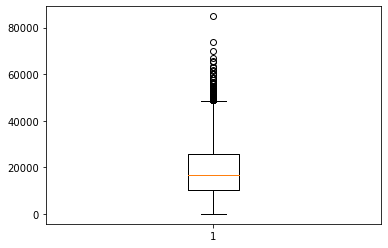

In [176]:
plt.boxplot(CJC['price'])

In [177]:
CJCk_No_Outlier = CJC[(CJC.Zscore_sp <3.0) & (CJC.Zscore_sp >-3.0)]
CJCk_No_Outlier

price  mileage        lot  Car_Age  Condition_Time  brand_audi  \
0      6300   274117  159348797       13           240.0           0   
1      2899   190552  166951262       10           144.0           0   
2      5350    39590  167655728        3            48.0           0   
3     25000    64146  167753855        7            22.0           0   
4     27700     6654  167763266        3            22.0           0   
...     ...      ...        ...      ...             ...         ...   
2494   7800    23609  167722715        2            24.0           0   
2495   9200    34553  167762225        3            21.0           0   
2496   9200    31594  167762226        3            21.0           0   
2497   9200    32557  167762227        3            48.0           0   
2498   9200    31371  167762228        3            21.0           0   

      brand_bmw  brand_buick  brand_cadillac  brand_chevrolet  ...  \
0             0            0               0                0  ...   
1             0            0               0                0  ...   
2             0            0               0                0  ...   
3             0            0               0                0  ...   
4             0            0               0                1  ...   
...         ...          ...             ...              ...  ...   
2494          0            0               0                0  ...   
2495          0            0               0                0  ...   
2496          0            0               0                0  ...   
2497          0            0               0                0  ...   
2498          0            0               0                0  ...   

      color_super black  color_tan  color_toreador red  \
0                     0          0                   0   
1                     0          0                   0   
2                     0          0                   0   
3                     0          0                   0   
4                     0          0                   0   
...                 ...        ...                 ...   
2494                  0          0                   0   
2495                  0          0                   0   
2496                  0          0                   0   
2497                  0          0                   0   
2498                  0          0                   0   

      color_triple yellow tri-coat  color_turquoise  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   
...                            ...              ...   
2494                             0                0   
2495                             0                0   
2496                             0                0   
2497                             0                0   
2498                             0                0   

      color_tuxedo black metallic  color_white  \
0                               0            0   
1                               0            0   
2                               0            0   
3                               0            0   
4                               0            0   
...                           ...          ...   
2494                            0            0   
2495                            0            0   
2496                            0            0   
2497                            0            0   
2498                            0            0   

      color_white platinum tri-coat metallic  color_yellow  Zscore_sp  
0                                          0             0  -1.029223  
1                                          0             0  -1.309980  
2                                          0             0  -1.107647  
3                                          0         

In [178]:
CJCk_No_Outlier.shape

(2474, 208)

In [179]:
CJC.shape[0] - CJCk_No_Outlier.shape[0]

25

{'whiskers': [<matplotlib.lines.Line2D at 0x21422fa3130>,
 'caps': [<matplotlib.lines.Line2D at 0x21422fa37f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21422f94d60>],
 'medians': [<matplotlib.lines.Line2D at 0x21422fa3eb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21422fab250>],
 'means': []}

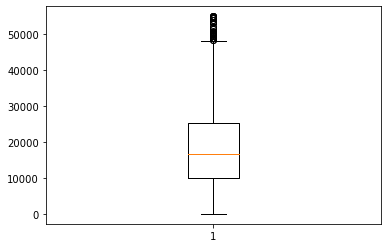

In [180]:
plt.boxplot(CJCk_No_Outlier['price'])

In [181]:
CJCkx_No_Outlier = CJCk_No_Outlier.drop(['price','Zscore_sp'],axis=1)
CJCkx_No_Outlier

mileage        lot  Car_Age  Condition_Time  brand_audi  brand_bmw  \
0      274117  159348797       13           240.0           0          0   
1      190552  166951262       10           144.0           0          0   
2       39590  167655728        3            48.0           0          0   
3       64146  167753855        7            22.0           0          0   
4        6654  167763266        3            22.0           0          0   
...       ...        ...      ...             ...         ...        ...   
2494    23609  167722715        2            24.0           0          0   
2495    34553  167762225        3            21.0           0          0   
2496    31594  167762226        3            21.0           0          0   
2497    32557  167762227        3            48.0           0          0   
2498    31371  167762228        3            21.0           0          0   

      brand_buick  brand_cadillac  brand_chevrolet  brand_chrysler  ...  \
0               0               0                0               0  ...   
1               0               0                0               0  ...   
2               0               0                0               0  ...   
3               0               0                0               0  ...   
4               0               0                1               0  ...   
...           ...             ...              ...             ...  ...   
2494            0               0                0               0  ...   
2495            0               0                0               0  ...   
2496            0               0                0               0  ...   
2497            0               0                0               0  ...   
2498            0               0                0               0  ...   

      color_silver  color_super black  color_tan  color_toreador red  \
0                0                  0          0                   0   
1                1                  0          0                   0   
2                1                  0          0                   0   
3                0                  0          0                   0   
4                0                  0          0                   0   
...            ...                ...        ...                 ...   
2494             0                  0          0                   0   
2495             1                  0          0                   0   
2496             1                  0          0                   0   
2497             0                  0          0                   0   
2498             1                  0          0                   0   

      color_triple yellow tri-coat  color_turquoise  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   
...                            ...              ...   
2494                             0                0   
2495                             0                0   
2496                             0                0   
2497                             0                0   
2498                             0                0   

      color_tuxedo black metallic  color_white  \
0                               0            0   
1                               0            0   
2                               0            0   
3                               0            0   
4                               0            0   
...                           ...          ...   
2494                            0            0   
2495                            0            0   
2496                            0            0   
2497                            0            0   
2498                            0            0   

      color_white platinum tri-coat metallic  color_yellow  
0   

## Option -2

In [182]:
from scipy.stats import norm

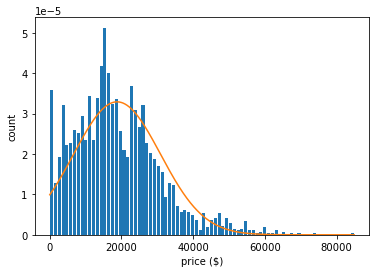

In [183]:
plt.hist(CJC.price, bins=80, rwidth=0.8, density=True)
plt.xlabel('price ($)')
plt.ylabel('count')

rng = np.arange(CJC.price.min(), CJC.price.max(), 0.1)
plt.plot(rng, norm.pdf(rng,CJC.price.mean(), CJC.price.std()))

In [184]:
CJC.price.mean()

18767.671468587436

In [185]:
CJC.price.std()

12116.094935650759

In [186]:
upper_limit = CJC.price.mean() + 4*CJC.price.std()
upper_limit

67232.05121119047

In [187]:
lower_limit = CJC.price.mean() - 1.5*CJC.price.std()
lower_limit

593.5290651112991

In [188]:
CJC[(CJC.price>upper_limit) | (CJC.price<lower_limit)]

price  mileage        lot  Car_Age  Condition_Time  brand_audi  \
141       0   177948  167756157       13            48.0           0   
144       0   123660  167756167        7            48.0           0   
188     175   231240  167756464       21            72.0           0   
196       0    76858  167656523        4            48.0           0   
206      25     7232  167756877        1            72.0           0   
...     ...      ...        ...      ...             ...         ...   
541      25   149189  167650663       11            17.0           0   
545       0        0  167358601       28            18.0           0   
1336  70000     9643  167780680        2            48.0           0   
1340  74000    10536  167780682        2            48.0           0   
2417    375        1  167619908        4            48.0           0   

      brand_bmw  brand_buick  brand_cadillac  brand_chevrolet  ...  \
141           0            0               0                0  ...   
144           0            0               0                0  ...   
188           0            0               0                0  ...   
196           0            0               0                0  ...   
206           0            0               0                1  ...   
...         ...          ...             ...              ...  ...   
541           0            0               0                1  ...   
545           0            0               0                0  ...   
1336          0            0               0                0  ...   
1340          0            0               0                0  ...   
2417          0            0               0                0  ...   

      color_super black  color_tan  color_toreador red  \
141                   0          0                   0   
144                   0          0                   0   
188                   0          0                   0   
196                   0          0                   0   
206                   0          0                   0   
...                 ...        ...                 ...   
541                   0          0                   0   
545                   0          0                   0   
1336                  0          0                   0   
1340                  0          0                   0   
2417                  0          0                   0   

      color_triple yellow tri-coat  color_turquoise  \
141                              0                0   
144                              0                0   
188                              0                0   
196                              0                0   
206                              0                0   
...                            ...              ...   
541                              0                0   
545                              0                0   
1336                             0                0   
1340                             0                0   
2417                             0                0   

      color_tuxedo black metallic  color_white  \
141                             0            0   
144                             0            0   
188                             0            0   
196                             0            1   
206                             0            0   
...                           ...          ...   
541                             0            1   
545                             0            0   
1336                            0            0   
1340                            0            0   
2417                            0            0   

      color_white platinum tri-coat metallic  color_yellow  Zscore_sp  
141                                        0             0  -1.549297  
144                                        0             0  -1.549297  
188                                        0             0  -1.534850  
196                                        0         

In [189]:
CJC_No_Outlier = CJC[(CJC.price<upper_limit) & (CJC.price>lower_limit)]
CJC_No_Outlier

price  mileage        lot  Car_Age  Condition_Time  brand_audi  \
0      6300   274117  159348797       13           240.0           0   
1      2899   190552  166951262       10           144.0           0   
2      5350    39590  167655728        3            48.0           0   
3     25000    64146  167753855        7            22.0           0   
4     27700     6654  167763266        3            22.0           0   
...     ...      ...        ...      ...             ...         ...   
2494   7800    23609  167722715        2            24.0           0   
2495   9200    34553  167762225        3            21.0           0   
2496   9200    31594  167762226        3            21.0           0   
2497   9200    32557  167762227        3            48.0           0   
2498   9200    31371  167762228        3            21.0           0   

      brand_bmw  brand_buick  brand_cadillac  brand_chevrolet  ...  \
0             0            0               0                0  ...   
1             0            0               0                0  ...   
2             0            0               0                0  ...   
3             0            0               0                0  ...   
4             0            0               0                1  ...   
...         ...          ...             ...              ...  ...   
2494          0            0               0                0  ...   
2495          0            0               0                0  ...   
2496          0            0               0                0  ...   
2497          0            0               0                0  ...   
2498          0            0               0                0  ...   

      color_super black  color_tan  color_toreador red  \
0                     0          0                   0   
1                     0          0                   0   
2                     0          0                   0   
3                     0          0                   0   
4                     0          0                   0   
...                 ...        ...                 ...   
2494                  0          0                   0   
2495                  0          0                   0   
2496                  0          0                   0   
2497                  0          0                   0   
2498                  0          0                   0   

      color_triple yellow tri-coat  color_turquoise  \
0                                0                0   
1                                0                0   
2                                0                0   
3                                0                0   
4                                0                0   
...                            ...              ...   
2494                             0                0   
2495                             0                0   
2496                             0                0   
2497                             0                0   
2498                             0                0   

      color_tuxedo black metallic  color_white  \
0                               0            0   
1                               0            0   
2                               0            0   
3                               0            0   
4                               0            0   
...                           ...          ...   
2494                            0            0   
2495                            0            0   
2496                            0            0   
2497                            0            0   
2498                            0            0   

      color_white platinum tri-coat metallic  color_yellow  Zscore_sp  
0                                          0             0  -1.029223  
1                                          0             0  -1.309980  
2                                          0             0  -1.107647  
3                                          0         

In [190]:
CJC_No_Outlier.shape

(2419, 208)

In [191]:
CJC.shape[0] - CJC_No_Outlier.shape[0]

80

{'whiskers': [<matplotlib.lines.Line2D at 0x21422d47910>,
 'caps': [<matplotlib.lines.Line2D at 0x21422d47fd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21422d475b0>],
 'medians': [<matplotlib.lines.Line2D at 0x21422d516d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21422d51a30>],
 'means': []}

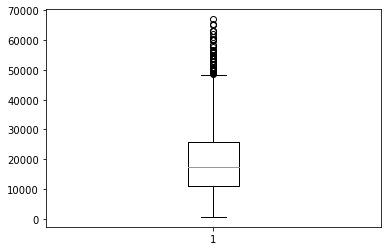

In [192]:
plt.boxplot(CJC_No_Outlier['price'])

## Note: Option 1 is selected (with 25 outliers removed) to complete my model

### Cheking for Multicollinearity

<AxesSubplot:>

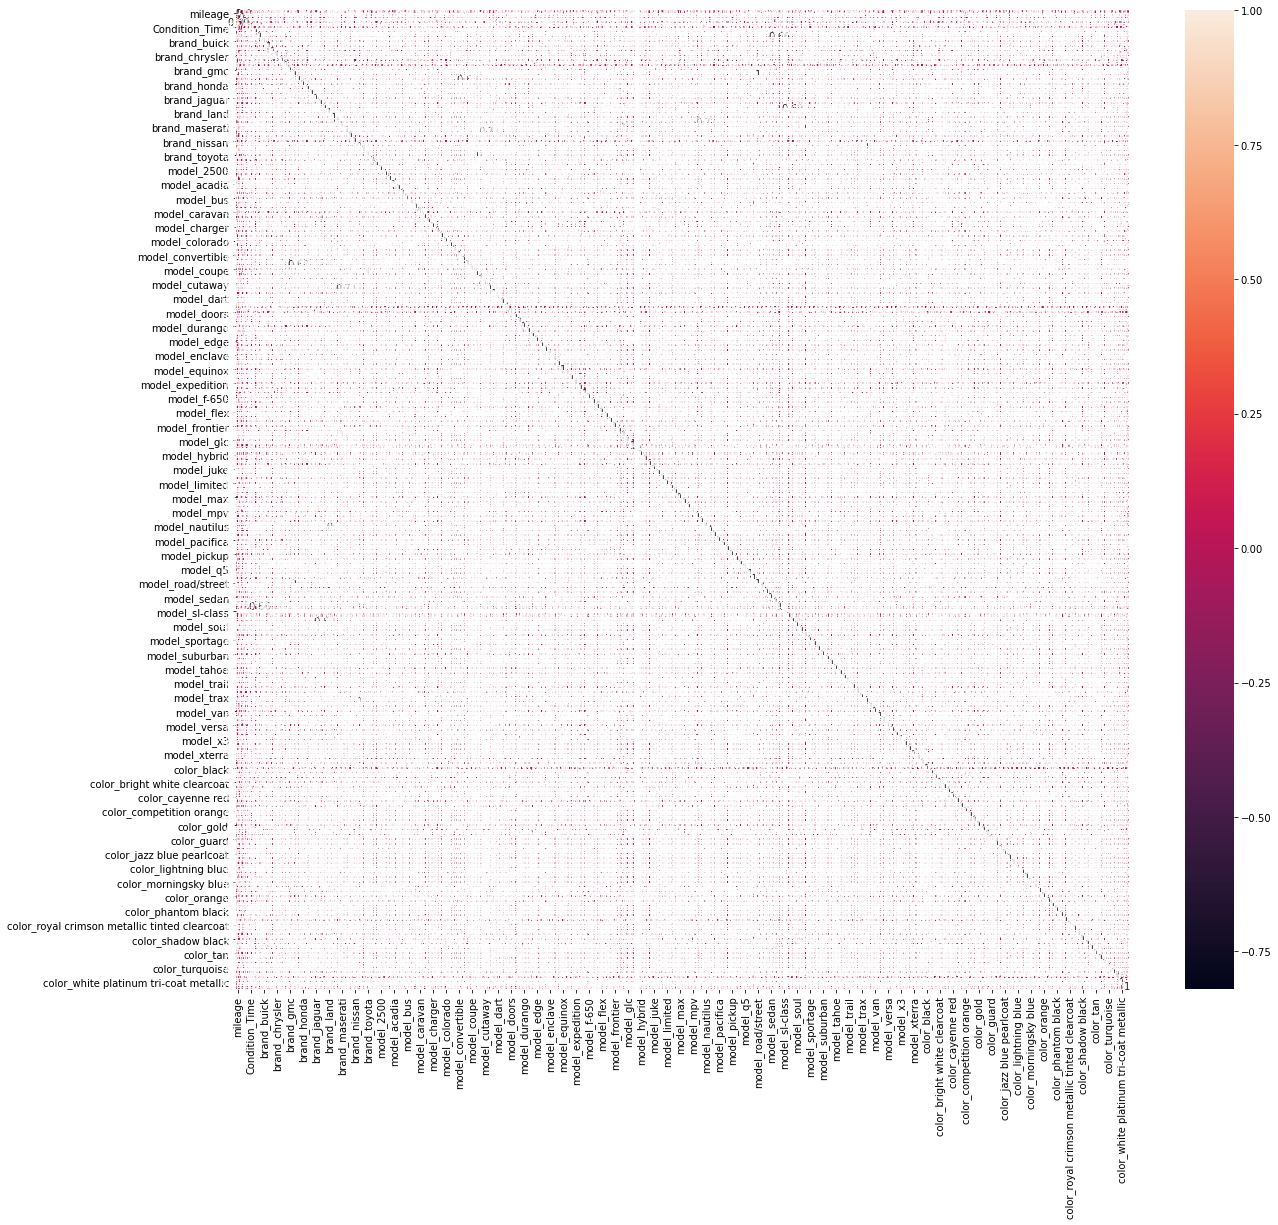

In [47]:
plt.figure(figsize=(20,18))
sns.heatmap(CJCkx_No_Outlier.corr(), annot=True)

In [193]:
corr = CJCkx_No_Outlier.corr()

corr

mileage       lot   Car_Age  \
mileage                                 1.000000 -0.129391  0.593575   
lot                                    -0.129391  1.000000 -0.164203   
Car_Age                                 0.593575 -0.164203  1.000000   
Condition_Time                         -0.043455 -0.207428  0.013366   
brand_audi                              0.043971 -0.039665  0.063475   
...                                          ...       ...       ...   
color_turquoise                        -0.006343  0.007293 -0.001770   
color_tuxedo black metallic             0.007194 -0.017479  0.013972   
color_white                             0.019176  0.060329 -0.006851   
color_white platinum tri-coat metallic  0.001574 -0.017489  0.013972   
color_yellow                            0.034790 -0.045678  0.029682   

                                        Condition_Time  brand_audi  brand_bmw  \
mileage                                      -0.043455    0.043971  -0.003109   
lot                                          -0.207428   -0.039665   0.017547   
Car_Age                                       0.013366    0.063475   0.060078   
Condition_Time                                1.000000   -0.010488  -0.022179   
brand_audi                                   -0.010488    1.000000  -0.003247   
...                                                ...         ...        ...   
color_turquoise                              -0.002289   -0.000809  -0.001622   
color_tuxedo black metallic                   0.074694   -0.001145  -0.002295   
color_white                                  -0.087064   -0.025329  -0.028411   
color_white platinum tri-coat metallic        0.074694   -0.001145  -0.002295   
color_yellow                                 -0.022537   -0.002432  -0.004875   

                                        brand_buick  brand_cadillac  \
mileage                                   -0.017904       -0.013279   
lot                                        0.024898        0.020501   
Car_Age                                    0.014652        0.033138   
Condition_Time                            -0.013927        0.001682   
brand_audi                                -0.002925       -0.002564   
...                                             ...             ...   
color_turquoise                           -0.001462       -0.001281   
color_tuxedo black metallic               -0.002067       -0.001812   
color_white                               -0.033345        0.016427   
color_white platinum tri-coat metallic    -0.002067       -0.001812   
color_yellow                              -0.004392       -0.003849   

                                        brand_chevrolet  brand_chrysler  ...  \
mileage                                        0.078734        0.029070  ...   
lot                                            0.133454        0.013426  ...   
Car_Age                                        0.115356        0.047563  ...   
Condition_Time                                -0.124940       -0.034282  ...   
brand_audi                                    -0.014807       -0.003445  ...   
...                                                 ...             ...  ...   
color_turquoise                                0.054652       -0.001722  ...   
color_tuxedo black metallic                   -0.010466       -0.002435  ...   
color_white                                    0.053379       -0.043334  ...   
color_white platinum tri-coat metallic        -0.010466       -0.002435  ...   
color_yellow                                   0.039919       -0.005173  ...   

                                        color_silver  color_super black  \
mileage                                    -0.019213          -0.006430   
lot                                         0.029877          -0.006247   
Car_Age                                    -0.066747           0.017116   
Condition_Time                             -0.028572           0.118776   
brand_audi    

## TRAIN AND TEST MY MODEL

In [194]:
import statsmodels.api as sm

In [195]:
x = sm.add_constant(CJCkx_No_Outlier)
y = CJCk_No_Outlier.iloc[:,0]

In [196]:
train_x,test_x,train_y,test_y = train_test_split(x,y,train_size=0.8, test_size=0.2, random_state=100)

## MODEL CREATION

In [197]:
Model_1 = sm.OLS(train_y, train_x).fit()

In [198]:
Model_1.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                        Results: Ordinary least squares
================================================================================================================
Model:                             OLS                             Adj. R-squared:                    0.688     
Dependent Variable:                price                           AIC:                               40442.7384
Date:                              2021-09-30 22:48                BIC:                               41437.8201
No. Observations:                  1979                            Log-Likelihood:                    -20043.   
Df Model:                          177                             F-statistic:                       25.66     
Df Residuals:                      1801                            Prob (F-statistic):                0.00      
R-squared:                         0.716                           Scale:                             4.0323e+07
----------------------------------------------------------------------------------------------------------------
                                                 Coef.       Std.Err.     t     P>|t|      [0.025       0.975]  
----------------------------------------------------------------------------------------------------------------
const                                         -542104.9264 305199.1938  -1.7762 0.0759 -1140686.6274  56476.7747
mileage                                            -0.0396      0.0038 -10.4598 0.0000       -0.0470     -0.0322
lot                                                 0.0034      0.0018   1.8402 0.0659       -0.0002      0.0070
Car_Age                                          -412.7751     77.1165  -5.3526 0.0000     -564.0224   -261.5279
Condition_Time                                      7.5232      3.1295   2.4040 0.0163        1.3855     13.6610
brand_audi                                       1767.5855   6367.8665   0.2776 0.7814   -10721.5967  14256.7678
brand_bmw                                        2883.2749   5387.8258   0.5351 0.5926    -7683.7712  13450.3211
brand_buick                                      6927.0984   5581.1965   1.2411 0.2147    -4019.2022  17873.3990
brand_cadillac                                  10654.2585   5176.5413   2.0582 0.0397      501.6009  20806.9161
brand_chevrolet                                  2602.8684   4598.8350   0.5660 0.5715    -6416.7441  11622.4809
brand_chrysler                                  -3546.8316   5244.0239  -0.6764 0.4989   -13831.8417   6738.1784
brand_dodge                                      -967.8313   4594.8011  -0.2106 0.8332    -9979.5323   8043.8697
brand_ford                                       3127.7947   4551.5181   0.6872 0.4920    -5799.0161  12054.6055
brand_gmc                                         -44.2217   4676.2771  -0.0095 0.9925    -9215.7201   9127.2767
brand_harley-davidson                           14106.5246   4195.3706   3.3624 0.0008     5878.2196  22334.8296
brand_heartland                                -14574.9174   4727.4389  -3.0830 0.0021   -23846.7583  -5303.0764
brand_honda                                     -2409.8853   4926.8390  -0.4891 0.6248   -12072.8063   7253.0356
brand_hyundai                                   -5151.0751   4951.9938  -1.0402 0.2984   -14863.3316   4561.1814
brand_infiniti                                   5951.4754   5108.5964   1.1650 0.2442    -4067.9230  15970.8739
brand_jaguar                                       -0.0003      0.0024  -0.1398 0.8888       -0.0051      0.0044
brand_jeep                                       1708.7335   4886.6343   0.3497 0.7266    -7875.3346  11292.8017
brand_kia                                       -6608.8090   5835.6732  -1.1325 0.2576   -18054.2101   4836.5921
brand_land                                       6111.9340   6032.7805   1.0131 0.3111    -5720.0501  17943.9180
brand_lexus                          

## Picking only the significant variables (those w/ P>|t| values < 0.05)

In [199]:
sig_var1 = ['mileage','lot','Car_Age','Condition_Time','brand_cadillac','brand_harley-davidson','brand_heartland','model_3500','model_altima','model_bus','model_caravan','model_cargo','model_compass','model_connect','model_corvette','model_coupe','model_cutaway','model_d','model_dart']

In [200]:
train_x = train_x[sig_var1]

In [201]:
Model_2 = sm.OLS(train_y, train_x).fit()

In [202]:
Model_2.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS              Adj. R-squared (uncentered): 0.793     
Dependent Variable:       price            AIC:                         42026.7484
Date:                     2021-09-30 22:48 BIC:                         42132.9650
No. Observations:         1979             Log-Likelihood:              -20994.   
Df Model:                 19               F-statistic:                 401.2     
Df Residuals:             1960             Prob (F-statistic):          0.00      
R-squared (uncentered):   0.795            Scale:                       9.6874e+07
----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
----------------------------------------------------------------------------------
mileage                   -0.0436    0.0044  -9.9392 0.0000     -0.0522    -0.0350
lot                        0.0001    0.0000  59.7096 0.0000      0.0001     0.0002
Car_Age                 -994.5103   80.6744 -12.3275 0.0000  -1152.7270  -836.2936
Condition_Time             5.5546    3.5630   1.5590 0.1192     -1.4330    12.5423
brand_cadillac          6908.7505 3327.6858   2.0761 0.0380    382.5761 13434.9248
brand_harley-davidson  35078.6458 9848.9231   3.5617 0.0004  15763.1834 54394.1082
brand_heartland       -14259.8900 5715.1789  -2.4951 0.0127 -25468.3563 -3051.4238
model_3500             28627.6224 5688.3916   5.0326 0.0000  17471.6907 39783.5540
model_altima           -7598.3756 2337.1718  -3.2511 0.0012 -12181.9787 -3014.7725
model_bus              -4396.1930 9848.4048  -0.4464 0.6554 -23710.6390 14918.2530
model_caravan          -5388.7051 1112.2872  -4.8447 0.0000  -7570.0950 -3207.3151
model_cargo            -3738.0196 9859.8419  -0.3791 0.7046 -23074.8957 15598.8565
model_compass          -5003.9737 4410.4160  -1.1346 0.2567 -13653.5716  3645.6242
model_connect          -5341.1729 9848.9627  -0.5423 0.5877 -24656.7129 13974.3670
model_corvette         22592.1941 6967.8758   3.2423 0.0012   8926.9699 36257.4183
model_coupe            -3466.5306 4500.9741  -0.7702 0.4413 -12293.7288  5360.6677
model_cutaway            -66.5127 3129.8471  -0.0213 0.9830  -6204.6908  6071.6654
model_d               -10546.3453 6966.4758  -1.5139 0.1302 -24208.8240  3116.1334
model_dart            -11252.9181 9845.4425  -1.1430 0.2532 -30561.5545  8055.7182
----------------------------------------------------------------------------------
Omnibus:                  239.806           Durbin-Watson:              2.067     
Prob(Omnibus):            0.000             Jarque-Bera (JB):           363.017   
Skew:                     0.867             Prob(JB):                   0.000     
Kurtosis:                 4.181             Condition No.:              7481876656
==================================================================================
* The condition number is large (7e+09). This might indicate             strong
multicollinearity or other numerical problems.
"""

In [203]:
sig_var2 = ['mileage','lot','Car_Age','brand_cadillac','brand_harley-davidson','brand_heartland','model_3500','model_altima','model_caravan','model_corvette']

In [204]:
train_x = train_x[sig_var2]

In [205]:
Model_3 = sm.OLS(train_y, train_x).fit()

In [206]:
Model_3.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Ordinary least squares
==================================================================================
Model:                    OLS              Adj. R-squared (uncentered): 0.793     
Dependent Variable:       price            AIC:                         42017.5129
Date:                     2021-09-30 22:49 BIC:                         42073.4163
No. Observations:         1979             Log-Likelihood:              -20999.   
Df Model:                 10               F-statistic:                 761.4     
Df Residuals:             1969             Prob (F-statistic):          0.00      
R-squared (uncentered):   0.795            Scale:                       9.6859e+07
----------------------------------------------------------------------------------
                         Coef.     Std.Err.    t     P>|t|     [0.025     0.975]  
----------------------------------------------------------------------------------
mileage                   -0.0439    0.0044 -10.0604 0.0000     -0.0525    -0.0353
lot                        0.0002    0.0000  68.9121 0.0000      0.0001     0.0002
Car_Age                 -995.7060   79.8664 -12.4672 0.0000  -1152.3375  -839.0746
brand_cadillac          6592.7566 3293.9369   2.0015 0.0455    132.7879 13052.7252
brand_harley-davidson  34901.1747 9847.0038   3.5443 0.0004  15589.5309 54212.8184
brand_heartland       -13603.6161 5702.2429  -2.3857 0.0171 -24786.6810 -2420.5512
model_3500             28525.0363 5687.0876   5.0158 0.0000  17371.6934 39678.3793
model_altima           -7693.0222 2335.4296  -3.2941 0.0010 -12273.1956 -3112.8487
model_caravan          -5359.7432 1111.9273  -4.8202 0.0000  -7540.4211 -3179.0653
model_corvette         22495.3751 6966.5673   3.2290 0.0013   8832.7555 36157.9946
----------------------------------------------------------------------------------
Omnibus:                  238.374           Durbin-Watson:              2.065     
Prob(Omnibus):            0.000             Jarque-Bera (JB):           357.965   
Skew:                     0.867             Prob(JB):                   0.000     
Kurtosis:                 4.154             Condition No.:              7463823697
==================================================================================
* The condition number is large (7e+09). This might indicate             strong
multicollinearity or other numerical problems.
"""

# Diagnose/Validate My Model

## Checking if there is Normal Distribution of the Residuals:

<Figure size 576x432 with 0 Axes>

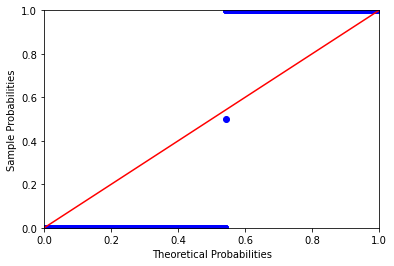

In [207]:
probplot = sm.ProbPlot(Model_3.resid)
plt.figure(figsize = (8,6))
probplot.ppplot(line = '45')
plt.show()

#### From above plot the residuals don't have a Normal Distribution since the RED & BLUE lines are far apart

## Test for Homoscedasticity

In [208]:
def get_standard_values(vals):
    return (vals - vals.mean()) / vals.std()

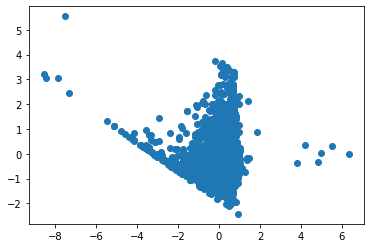

In [209]:
plt.scatter(get_standard_values(Model_3.fittedvalues), get_standard_values(Model_3.resid))

#### There is no pattern and the plot is more concentrated in the middle of the plot area

# MAKE PREDICTIONS

In [210]:
pred = Model_3.predict(test_x[sig_var2])

In [211]:
pred

1489    22774.439652
1014    22266.297117
319      7664.696901
621     20548.656092
1456    18624.364817
            ...     
1809    13503.261569
2039    17393.814537
2053    22181.800106
748     19730.322582
2092    20710.367648
Length: 495, dtype: float64

In [212]:
## Measure the RMSE value
np.sqrt(metrics.mean_squared_error(pred, test_y))

9868.019806659615

In [213]:
## Measure R2 value
np.round(metrics.r2_score(pred, test_y), 2)

-2.25

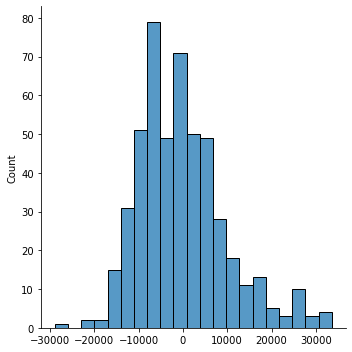

In [214]:
## Distribution plot: Pred vs Actual
sns.displot(test_y - pred)

C:\Users\12146\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:ylabel='Density'>

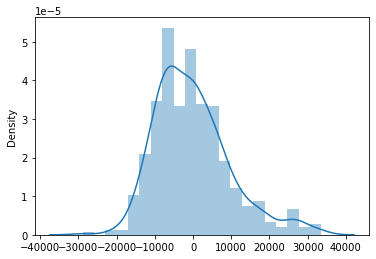

In [215]:
## Distribution plot: Pred vs Actual
sns.distplot(test_y - pred)

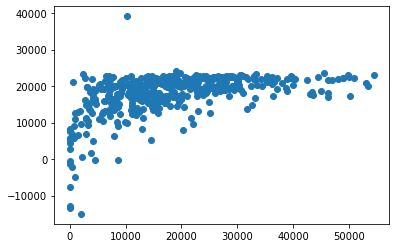

In [216]:
plt.scatter(test_y, pred)